In [1]:
from keras.models import load_model


classifier = load_model('sketchmodel125final.h5')


Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Use tf.cast instead.


In [51]:
from PIL import ImageTk, Image, ImageDraw
import PIL
from tkinter import *

width = 256
height = 256
center = height//2
white = (255, 255, 255)
green = (0,128,0)

def save():
    filename = "image.jpg"
    image1.save(filename)

def paint(event):
    # python_green = "#476042"
    x1, y1 = (event.x - 1), (event.y - 1)
    x2, y2 = (event.x + 1), (event.y + 1)
    cv.create_oval(x1, y1, x2, y2, fill="black",width=5)
    draw.line([x1, y1, x2, y2],fill="black",width=5)

root = Tk()

# Tkinter create a canvas to draw on
cv = Canvas(root, width=width, height=height, bg='white')
cv.pack()

# PIL create an empty image and draw object to draw on
# memory only, not visible
image1 = PIL.Image.new("RGB", (width, height), white)
draw = ImageDraw.Draw(image1)

# do the Tkinter canvas drawings (visible)
# cv.create_line([0, center, width, center], fill='green')

cv.pack(expand=YES, fill=BOTH)
cv.bind("<B1-Motion>", paint)

# do the PIL image/draw (in memory) drawings
# draw.line([0, center, width, center], green)

# PIL image can be saved as .png .jpg .gif or .bmp file (among others)
# filename = "my_drawing.png"
# image1.save(filename)
button=Button(text="save",command=save)
button.pack()
root.mainloop()

In [2]:
import numpy as np
from keras.preprocessing import image
#test_image = image.load_img('testing/image.png', target_size = (256,256))
test_image = image.load_img('door.jpg', target_size = (256,256))
#test_image = image.load_img('/home/kazi/random4.jpg', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis =0)
result = classifier.predict(test_image)
#training_set.class_indices

In [3]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)


training_set = train_datagen.flow_from_directory('sketchyTrain/',
                                                 target_size = (256, 256),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
#training_set.class_indices

Found 75481 images belonging to 125 classes.


In [4]:
idxarr = result.argmax(axis=1)
index = idxarr[0]
prediction = []

for key, indexx in training_set.class_indices.items():    # for name, age in dictionary.iteritems():  (for Python 2.x)
    if indexx == index:
        prediction = key
        print(key)

door


In [5]:
from azure.cognitiveservices.search.imagesearch import ImageSearchAPI
from msrest.authentication import CognitiveServicesCredentials

subscription_key = "4487a9eb07064493aaf5f9648bd4bd25"
search_term = prediction

"""
This application will search images on the web with the Bing Image Search API and print out first image result.
"""
#create the image search client
client = ImageSearchAPI(CognitiveServicesCredentials(subscription_key))
# send a search query to the Bing Image Search API
image_results = client.images.search(query=search_term)
print("Searching the web for images of: {}".format(search_term))

# Image results
if image_results.value:
    first_image_result = image_results.value[0]
    print("Total number of images returned: {}".format(len(image_results.value)))
    print("First image thumbnail url: {}".format(first_image_result.thumbnail_url))
    print("First image content url: {}".format(first_image_result.content_url))
else:
    print("Couldn't find image results!")

Searching the web for images of: door
Total number of images returned: 35
First image thumbnail url: https://tse3.mm.bing.net/th?id=OIP.l7aBz79hk7xhRBnakJ1QkQHaKV&pid=Api
First image content url: http://pngimg.com/uploads/door/door_PNG17559.png


In [6]:
path_text = "urls/"+prediction + ".txt"

for i in range(9):
    image_url = format(image_results.value[i].thumbnail_url)
    with open(path_text, 'a') as the_file:
        the_file.write(image_url + '\n')

In [7]:
from imutils import paths
import argparse
import cv2
import requests, os

#path_text = prediction + ".txt"

o = open(path_text,"r")
url0 = o.read()
o.close()

## list, containing downloaded files 
urls = url0.split()
print("The number of urls: {}".format(len(urls)))
print("____________________________")
for url in urls[:10]:
    print(url)

The number of urls: 9
____________________________
https://tse3.mm.bing.net/th?id=OIP.l7aBz79hk7xhRBnakJ1QkQHaKV&pid=Api
https://tse4.mm.bing.net/th?id=OIP.9D0tan0LgVgh9Me6sdjnaAHaFv&pid=Api
https://tse3.mm.bing.net/th?id=OIP.nm0IJO0risgcLJNnCj6NDQHaKy&pid=Api
https://tse3.mm.bing.net/th?id=OIP.tbzZ3-46BC0hxu-lnz1f6AHaRt&pid=Api
https://tse2.mm.bing.net/th?id=OIP.QzAM7f5jKbBl3weYlNkTRAHaLv&pid=Api
https://tse1.mm.bing.net/th?id=OIP.ysXPH5AYOIVKgeJPfbazOwHaLv&pid=Api
https://tse3.mm.bing.net/th?id=OIP.y5f3Z70qCxGQ1LVGOBM2hwHaJ4&pid=Api
https://tse4.mm.bing.net/th?id=OIP.MRXkriE2xH4Wt-M_GAgqyQHaFj&pid=Api
https://tse2.mm.bing.net/th?id=OIP.VpACLrYMdSKy0M1wjJxxlQHaL-&pid=Api


In [8]:
import requests,os

#prediction = "airplane"

loc_data = "./retrieved_data/" + prediction + "/"
try:
    os.makedirs(loc_data)
except:
    pass
iimage = 0
for url in urls:
    try:
        f = open(loc_data + 'image{:05.0f}.jpg'.format(iimage),'wb')
        f.write(requests.get(url).content)
        f.close()
        iimage += 1
    except Exception as e:
        print("\n{} {}".format(e,url))
        pass

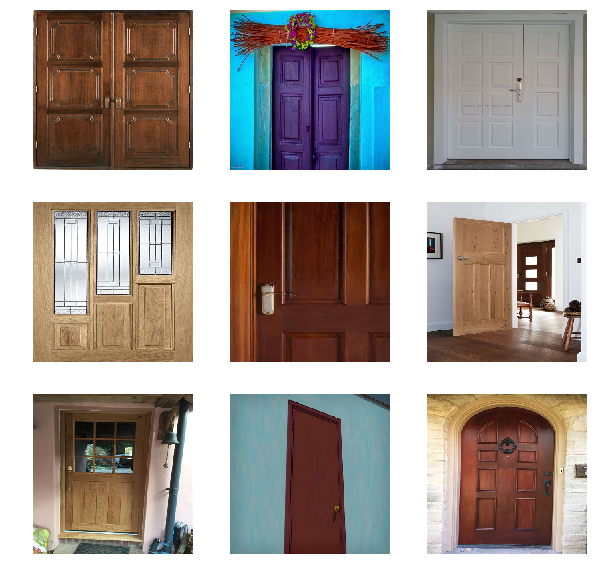

In [10]:
from keras.preprocessing.image import load_img 
import matplotlib.pyplot as plt

fnames = os.listdir(loc_data)
fig = plt.figure(figsize=(10,10))
count = 1
for fnm in fnames[:9]:
    img = load_img(loc_data +fnm,target_size=(400,400))
    ax = fig.add_subplot(3,3,count)
    count += 1
    ax.imshow(img)
    ax.axis("off")
plt.show()

In [10]:
result

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e

In [ ]:
# Analysis

In [1]:
from keras.models import load_model
import numpy as np
from keras.preprocessing import image


classifier = load_model('sketchmodel125final.h5')
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)


training_set = train_datagen.flow_from_directory('sketchyTrain/',
                                                 target_size = (256, 256),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')


Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Use tf.cast instead.
Found 75481 images belonging to 125 classes.


In [71]:
from os import listdir
keys =[]
for key,index in training_set.class_indices.items():
    keys.append([key, 0])

# print(keys)
# training_set.class_indices.items()
# keys[35]
keyIndex = 0 
for i in range(125):
    className = keys[i][0]
    count = 0
    correctCount = 0
    path = 'sketchyTest/' + className +'/'
#     print (path)
    for file in listdir(path):
        count +=1
        imagePath = path+file
#         print(imagePath)
        test_image = image.load_img(imagePath, target_size = (256,256))
        test_image = image.img_to_array(test_image)
        test_image = np.expand_dims(test_image, axis =0)
        result = classifier.predict(test_image)
        idxarr = result.argmax(axis=1)
        indexxx = idxarr[0]
        prediction = []
        for key, indexx in training_set.class_indices.items():    # for name, age in dictionary.iteritems():  (for Python 2.x)
            if indexx == indexxx:
                if key == className:
                    correctCount +=1
#                     print(correctCount)
        
    keys[keyIndex][1] = correctCount/count
    print(keys[keyIndex])
    keyIndex +=1

['airplane', 0.0]
['alarm_clock', 0.0375]
['ant', 0.0]
['ape', 0.14960629921259844]
['apple', 0.0]
['armor', 0.11333333333333333]
['axe', 0.0]
['banana', 0.0]
['bat', 0.09655172413793103]
['bear (animal)', 0.0]
['bee', 0.0]
['beetle', 0.04895104895104895]
['bell', 0.0]
['bench', 0.2125]
['bicycle', 0.1]
['blimp', 0.0]
['bread', 0.0]
['butterfly', 0.0]
['cabin', 0.5408163265306123]
['camel', 0.0]
['candle', 0.0125]
['cannon', 0.0]
['car (sedan)', 0.0625]
['castle', 0.6125]
['cat', 0.0]
['chair', 0.1]
['chicken', 0.2357142857142857]
['church', 0.1125]
['couch', 0.0875]
['cow', 0.0]
['crab', 0.0125]
['crocodile', 0.0125]
['cup', 0.0]
['deer', 0.373134328358209]
['dog', 0.0]
['dolphin', 0.0]
['door', 0.1375]
['duck', 0.0125]
['elephant', 0.0]
['eyeglasses', 0.0]
['fan', 0.0]
['fish', 0.025]
['flower', 0.05]
['frog', 0.0]
['geyser', 0.1793103448275862]
['giraffe', 0.0875]
['guitar', 0.025]
['hamburger', 0.0125]
['hammer', 0.0]
['harp', 0.0125]
['hat', 0.0]
['hedgehog', 0.4125]
['helicopter'

['airplane', 0.0]
['alarm_clock', 0.0375]


In [85]:
import pandas

classes = []
values = []
for i in range (125):
    classes.append(keys[i][0])
    values.append(keys[i][1])
    
df = pandas.DataFrame(data={"col1": classes, "col2": values})
df.to_csv("./eval.csv", sep=',',index=False)

0.0875